In [1]:
import splat
import wisps
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
%matplotlib inline
import splat.plot as splt
import warnings

import matplotlib as mpl

#import mplcyberpunk


Adding 2404 sources from /Users/caganze/research/splat//resources/Spectra/Public/SPEX-PRISM/ to spectral database
Adding 145 sources from /Users/caganze/research/splat//resources/Spectra/Public/LRIS-RED/ to spectral database
Adding 89 sources from /Users/caganze/research/splat//resources/Spectra/Public/MAGE/ to spectral database


In [2]:
splat.initializeStandards()

In [3]:
def makewisps_spectrum(s, spt):
    try:
        s=wisps.Spectrum(wave=s.wave.value, flux=s.flux.value, \
                              noise=s.noise.value, contam=np.zeros_like(s.wave.value),\
                         spt=(splat.typeToNum(spt), 0))
        return s
    except KeyError:
        return None

In [4]:
def get_indices(sp):
    
    return pd.Series({'spt': sp.spectral_type[0], **sp.indices})

In [5]:
st_spts=[splat.typeToNum(x) for x in np.arange(17, 40)]
standards=[splat.getStandard(x) for x in st_spts]

In [6]:
dsd_spts=[x for x in splat.STDS_DSD_SPEX.keys() ]
dsd_standards=[splat.STDS_DSD_SPEX[k] for k in dsd_spts]

sd_spts=[x for x in splat.STDS_SD_SPEX.keys() ]
sd_standards=[splat.STDS_SD_SPEX[k] for k in sd_spts]

In [7]:
wispsstandards=[ makewisps_spectrum(x, y) for x, y in zip(standards,  st_spts)]

In [8]:
sd_wispsstandards=[ makewisps_spectrum(x, y) for x, y in zip(sd_standards,  sd_spts)]
dsd_wispsstandards=[ makewisps_spectrum(x, y) for x, y in zip(dsd_standards,  dsd_spts)]

In [9]:
sd_wispsstandards=[x for x in sd_wispsstandards if x is not None]
dsd_wispsstandards=[x for x in dsd_wispsstandards if x is not None]

In [10]:
indices_df=wisps.Annotator.reformat_table(pd.DataFrame([get_indices(x) for x in wispsstandards]))

In [11]:
sd_indices_df=wisps.Annotator.reformat_table(pd.DataFrame([get_indices(x) for x in sd_wispsstandards]))
dsd_indices_df=wisps.Annotator.reformat_table(pd.DataFrame([get_indices(x) for x in dsd_wispsstandards]))

In [12]:
len(wisps.INDEX_NAMES)

16

In [13]:
big=wisps.get_big_file()

In [15]:
#h

In [17]:
#len(bins), len(h[0])

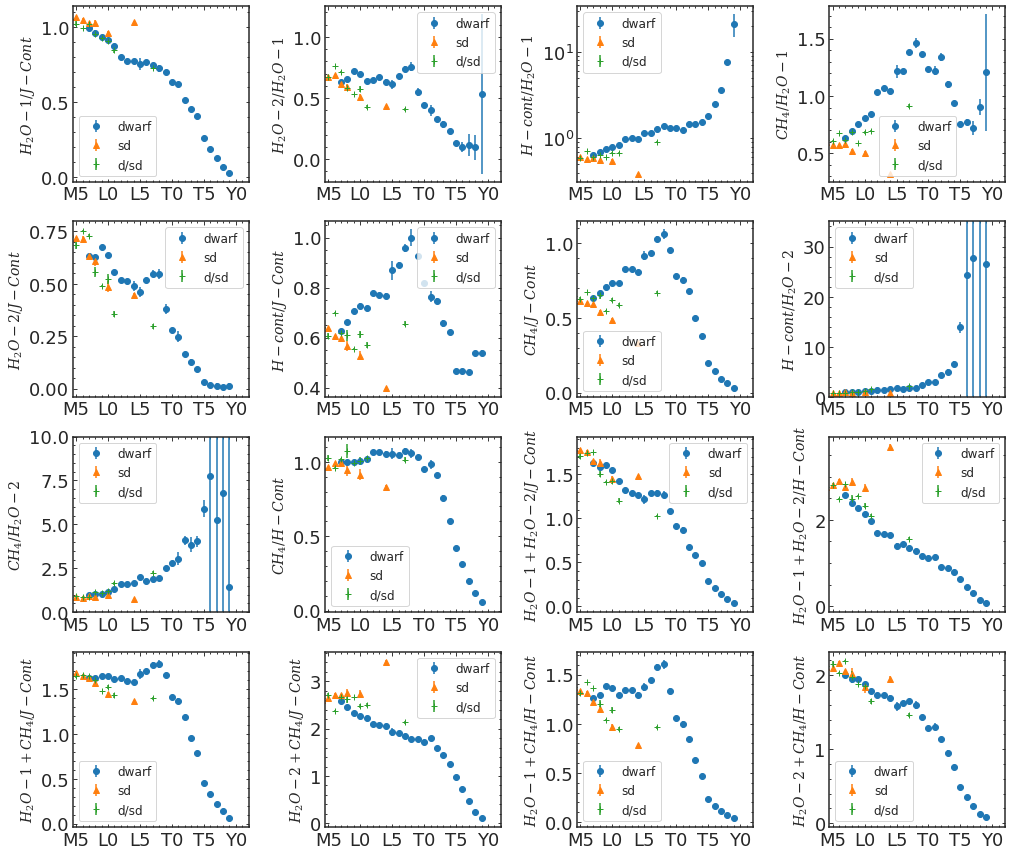

In [20]:
fig, ax=plt.subplots(ncols=4, nrows=4, figsize=(14, 12))
for a, key in zip(np.concatenate(ax), wisps.INDEX_NAMES):
    a.errorbar(indices_df.spt, indices_df[key], yerr=indices_df[key+'_er'], fmt='o', label='dwarf')
    a.errorbar(sd_indices_df.spt, sd_indices_df[key], yerr=sd_indices_df[key+'_er'], fmt='^', label='sd')
    a.errorbar(dsd_indices_df.spt, dsd_indices_df[key], yerr=dsd_indices_df[key+'_er'], fmt='+',  label='d/sd')
    a.set( xticks=[15, 20, 25, 30, 35, 40], \
          xticklabels=['M5', 'L0', 'L5', 'T0', 'T5', 'Y0'], xlim=[14.5, 42])
    #ax.set_
    #ax.set_
    a.set_ylabel(r'$'+str(key)+'$', fontsize=14)
    a.legend(fontsize=12)
    a.minorticks_on()
    
ax[2][0].set(ylim=[0, 10])
ax[1][-1].set(ylim=[0, 35])
ax[0][2].set(yscale='log')
plt.tight_layout()
plt.savefig(wisps.OUTPUT_FIGURES+'/indicestrends.pdf',  \
            bbox_inches='tight',  facecolor='white', transparent=False)
